In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model


In [7]:
sp_df = pd.read_csv('SP500.csv')

# Drop rows with value '.'
df = sp_df.drop(sp_df[sp_df['SP500']== '.'].index)

In [8]:
values = df['SP500'].astype(float)
returns = (100*(np.log(values.shift()) - np.log(values)))[1:]
returns

1       2.628894
2      -1.092319
3       0.320833
4      -0.652414
5      -1.260744
          ...   
1301   -0.198784
1302   -0.967533
1303    0.198655
1304   -0.423072
1305    0.897295
Name: SP500, Length: 1258, dtype: float64

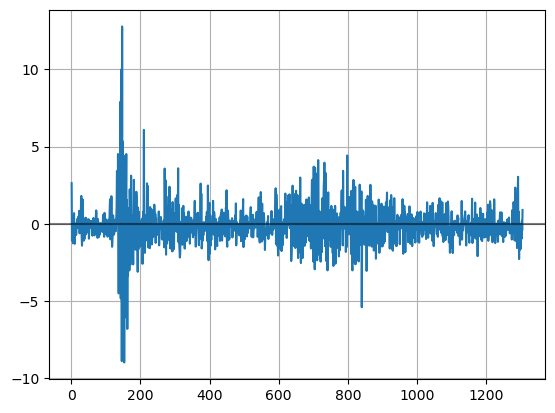

In [9]:
plt.plot(returns)

plt.axhline(0,0,1,color='black', alpha=0.5)
plt.grid(True)
plt.show()

Text(0, 0.5, 'Correlation Coefficient')

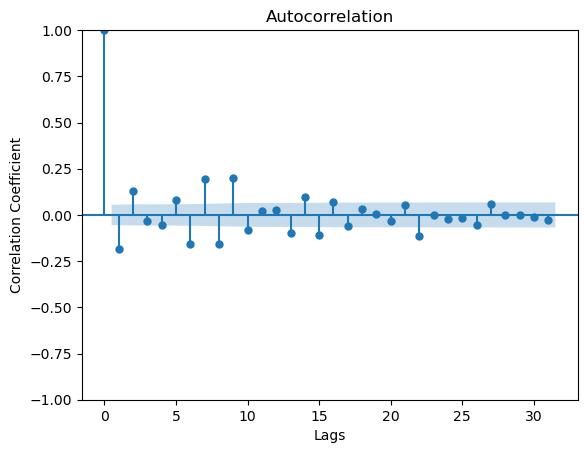

In [10]:
x = plot_acf(returns)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficient')

Yes, there seems to be correlation with lag 1 and lag 2.

### b)

In [11]:
squared = returns**2

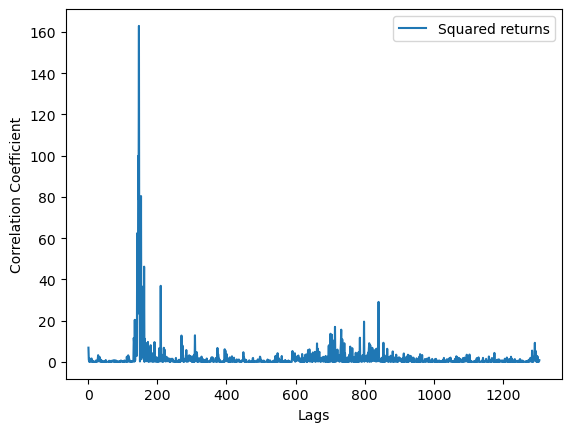

In [12]:
plt.plot(squared, label='Squared returns')
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficient')

plt.legend()
plt.show()

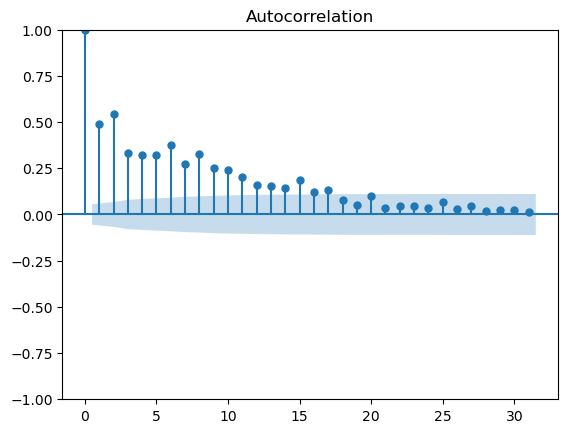

In [13]:
y = plot_acf(squared)

Displays a much stronger sereial correlation, suggesting lags all the way through 15 has an effect.

### c)

Idea:

Create white noise. Train a GARCH model on it an show that the GARCH(1,1) model has the sum of alpha and beta less than 1

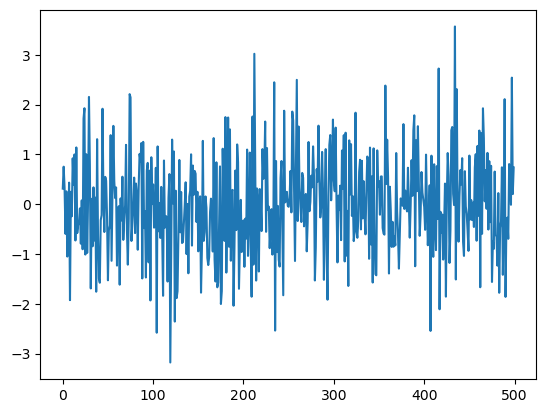

In [28]:
white_noise = np.random.normal(0,1, size=500)
plt.plot(white_noise)

In [29]:
model = arch_model(white_noise, q=1, p=1)
result = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2025.5803455216517
Iteration:      2,   Func. Count:     14,   Neg. LLF: 731.4856273562536
Iteration:      3,   Func. Count:     21,   Neg. LLF: 710.4087637906025
Iteration:      4,   Func. Count:     27,   Neg. LLF: 710.6977723276204
Iteration:      5,   Func. Count:     33,   Neg. LLF: 709.8960975587443
Iteration:      6,   Func. Count:     38,   Neg. LLF: 709.8955032768304
Iteration:      7,   Func. Count:     43,   Neg. LLF: 709.8954994185196
Iteration:      8,   Func. Count:     47,   Neg. LLF: 709.8954994185888
Optimization terminated successfully    (Exit mode 0)
            Current function value: 709.8954994185196
            Iterations: 8
            Function evaluations: 47
            Gradient evaluations: 8


In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -709.895
Distribution:                  Normal   AIC:                           1427.79
Method:            Maximum Likelihood   BIC:                           1444.65
                                        No. Observations:                  500
Date:                Mon, Sep 23 2024   Df Residuals:                      499
Time:                        13:34:26   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0191  4.465e-02     -0.428      0.669 [ -0.107,6.841e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4587      0.255      1.796  7.242e-02 [-4.175e-02,  0.959]
alpha[1]       0.0319  3.742e-02      0.852      0.394 [-4.146e-02,  0.105]
beta[1]        0.5117      0.274      1.865  6.222e-02 [-2.614e-02,  1.050]
===========================================================================

Covariance estimator: robust
"""

In [40]:
errors = np.random.normal(0,1,500)
def r(variance, error):
    return np.sqrt(variance)*error

def variance(r_t_1, var_t_1):
    return 0.2 + 0.2*r_t_1**2 + 0.2 * var_t_1

In [41]:
var_0 = 1
r_0 = 1
variances = [var_0]
returns = [r_0]
for idx, error in enumerate(errors):
    r_prev, var_prev = returns[-1], variances[-1]
    var = variance(r_prev, var_prev)
    r_now = r(var, error)
    variances.append(var), returns.append(r_now)


    

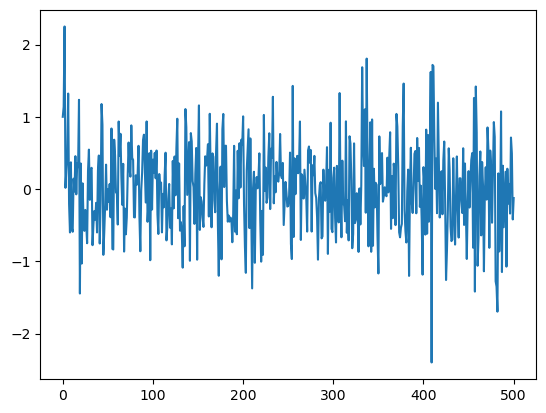

In [42]:
plt.plot(returns)

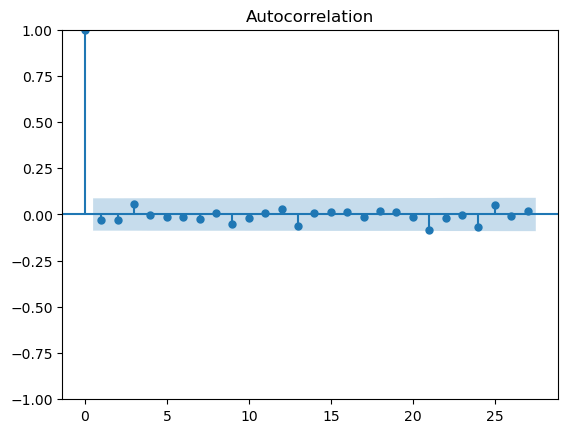

In [50]:
pd_r = pd.Series(returns)
c = plot_acf(pd_r)

In [48]:
np.mean(returns) # Very close to 0

0.015154643989824315